# Discussion 7: More Quasi-Newton Methods

In this discussion, we will talk about:
* The SR1 method
* DFP method
* BFGS method

---

## Quasi-Newton Methods

Recall:
### Newton's Method
$$ \mathbf{x}_{k+1} = \mathbf{x}_k - \left[\nabla^2 f_k\right]^{-1}\nabla f_k $$
which can be viewed as a line search algorithm with $\mathbf{p}_k = -\left[\nabla^2 f_k\right]^{-1}\nabla f_k$, called the Newton direction, and $\alpha_k=1$.

* Newton's method converges in a single step for quadratic functions
* Newton's method converges quadratically if $\nabla^2 f$ is invertible and the initial guess is "close enough" to the minimizer.

* One big issue with Newton's method is that you have to compute and invert the Hessian matrix, which has high computational cost.

### Quasi-Newton Methods
Quasi-Newton methods approximate the Hessian with a positive definite $B_k$ during each iteration, or they approximate the inverse of the Hessian with a matrix $H_k$.

An iteration of Quasi-Newton takes the form
$$\mathbf{x}_{k+1} = \mathbf{x}_k - \alpha_kB_k^{-1}\nabla f_k$$
Or
$$\mathbf{x}_{k+1} =  \mathbf{x}_k - \alpha_kH_k\nabla f_k$$

where $B_k$ is a positive definite approximation of the Hessian $\nabla^2 f_k$ and/or $H_k$ is a positive definite approximation of the inverse Hessian $[\nabla^2f_k]^{-1}$.

#### Features of Quasi-Newton Methods
The actual Hessian satisfies
$$ \nabla^2f_k(\mathbf{x}_{k+1}-\mathbf{x}_k)\approx \nabla f_{k+1}-\nabla f_k $$

So we choose $B_k$ so that it has the same property:
$$ B_{k+1}(\mathbf{x}_{k+1}-\mathbf{x}_k)= \nabla f_{k+1}-\nabla f_k,\qquad\text{or}\qquad B_{k+1}\mathbf{s}_k = \mathbf{y}_k $$

with $\mathbf{s}_k\equiv \mathbf{x}_{k+1}-\mathbf{x}_k$ and $\mathbf{y}_k\equiv\nabla f_{k+1}-\nabla f_k$.

This is called the **secant equation**.

Equivalently, we have
$$ H_{k+1}(\nabla f_{k+1}-\nabla f_k)=\mathbf{x}_{k+1}-\mathbf{x}_k,\qquad\text{or}\qquad H_{k+1}\mathbf{y}_k =\mathbf{s}_k $$
Which is called the **dual secant equation**.

#### Peculiarity of solving this Equation

This isn't a typical system of equations: Usually you imagine $Ax=b$, where $A$ is $n \times n$ and $b$ is $n \times 1$, so you solve for the $n \times 1$ vector $x$. In this case:

$$ \underbrace{H_{k+1}}_{n \times n}(\underbrace{\nabla f_{k+1}}_{n \times 1}-\underbrace{\nabla f_k}_{n \times 1})=\underbrace{\mathbf{x}_{k+1}}_{n \times }-\underbrace{\mathbf{x}_k}_{n \times 1},\qquad\text{or}\qquad H_{k+1}\mathbf{y}_k =\mathbf{s}_k $$

We're solving for the matrix $H_{k+1}$, an $n \times n$ vector. So there are only $n$ equations determining $n^2$ components of this $n \times n$ matrix. This system is undetermined so it admits infinitely many solutions. This is the reason why we can have multiple Quasi-Newton methods that satisfy the secant equation: since the system is undetermined, we can impose various other requirements on $H_{k+1}$, each choice giving rise to a different quasi-Newton method.

**Key feature** of quasi-Newton methods: They recursively define $H_{k+1}$ by updating the old approximation $H_k$.

### Symmetric Rank-1 (SR1) Method

The simplest quasi-Newton method is the **symmetric rank-1 (SR1) method** which requires updates to the inverse Hessian to be of the form

$$ H_{k+1} = H_k + \mathbf{z}_k\mathbf{z}_k^T $$

where $\mathbf{z}_k$ is a vector chosen to satisfy the secant equation, and $H_0$ can be chosen as any positive definite initial approximation (often simply $H_0\equiv I$). The rank one update is then determined by the secant equation to be

$$ \mathbf{z}_k\mathbf{z}_k^T = \frac{(\mathbf{s}_k - H_k \mathbf{y}_k) (\mathbf{s}_k - H_k \mathbf{y}_k)^T}{(\mathbf{s}_k - H_k \mathbf{y}_k)^T \mathbf{y}_k} $$

### Benefits:
* No explicit calculation / inversion of the Hessian is needed
* Each update is guaranteed to be symmetric since $z_k z_k^T$ is symmetric.

### Disadvantages:
* The update doesn't preserve positive definiteness of the inverse Hessian.
* Denominator can vanish if $(s_k - H_k y_k)^T = 0$
 * The workaround: If demoninator vanishes, skip updating the iteration ($H_{k+1} = H_k$), everything works out fine then.

All together, then, the SR1 method can be described as follows:

1. Set $H_0=I$, the identity matrix.
2. Update $\mathbf{x}_{k+1} = \mathbf{x}_k - \alpha_k H_k\nabla f_k$, where $\alpha_k$ is chosen using any step size method, e.g. exact line search, backtracking, etc.
3. Define $\mathbf{s}_k \equiv \mathbf{x}_{k+1}-\mathbf{x}_k$, $\mathbf{y}_k\equiv\nabla f_{k+1}-\nabla f_k$, and check if $|(\mathbf{s}_k-H_k\mathbf{y}_k)^T\mathbf{y}_k|<10^{-8}\|\mathbf{s}_k-H_k\mathbf{y}_k\|\|\mathbf{y}_k\|$.
4. If true, set $H_{k+1}=H_k$ (skipping the update). If false, set $H_{k+1} = H_k + \dfrac{(\mathbf{s}_k - H_k \mathbf{y}_k) (\mathbf{s}_k - H_k \mathbf{y}_k)^T}{(\mathbf{s}_k - H_k \mathbf{y}_k)^T \mathbf{y}_k}$.
5. Repeat 2-4 until convergence.

### Convergence
* Convergence is *superlinear* at worst $(p>1)$. Compared to "pure" Newton, which is quadratic, $p=2$, at worst.
* SR1 converges in a *finite number of steps* (at most $n$ if $\mathbf{x}\in\mathbb{R}^n$) if $f$ is a quadratic function and $\alpha_k$ is chosen through exact line search. (Contrast with pure Newton, which converges in a *single* step.)

### Davidon-Fletcher-Powell (DFP) method

Another quasi-Newton method was actually proposed before SR1 and is called the **Davidon-Fletcher-Powell (DFP) method**. Rather than requiring a rank 1 update to the inverse Hessian, DFP focuses on the Hessian approximation itself, $B_{k+1}$. Since the secant equation underdetermines this matrix, the DFP update is constrained such that $B_{k+1}$ is the "closest" matrix to $B_k$ in the following sense:

$$ B_{k+1} = \min_B \|B-B_k\|_{F,W}\qquad \text{subject to } B=B^T, B\mathbf{s}_k=\mathbf{y}_k $$

Here the norm is chosen to be the *weighted [Frobenius norm](https://mathworld.wolfram.com/FrobeniusNorm.html)*, $\|A\|_{F,W} = \|W^{1/2}AW^{1/2}\|_F$, and $\|C\|_F^2 = \sum_{i,j} c_{ij}^2$. The weight matrix $W$ need only satisfy $W\mathbf{s}_k=\mathbf{y}_k$. This choice of norm is that allows the minimization problem to be solved as a least squares problem, resulting in the following iteration:

$$ B_{k+1} = \left(I-\frac{\mathbf{y}_k\mathbf{s}_k^T}{\mathbf{y}_k^T\mathbf{s}_k}\right)B_k\left(I-\frac{\mathbf{s}_k\mathbf{y}_k^T}{\mathbf{y}_k^T\mathbf{s}_k}\right) + \frac{\mathbf{y}_k\mathbf{y}_k^T}{\mathbf{y}_k^T\mathbf{s}_k} $$

For a complete derivation, see [this StackExchange answer](https://math.stackexchange.com/questions/2091867/quasi-newton-methods-understanding-dfp-updating-formula).

In practice, this calculation is never done because we don't really care about $B_{k+1}$, only its inverse, $H_{k+1}$. To obtain the inverse, we make use of the following useful theorem, the result of which is called the **Sherman-Morrison formula**:

If $\bar{A}=A+\mathbf{u}\mathbf{v}^T$ is obtained by a rank-1 update, the inverse,

$$ \bar{A}^{-1} = A^{-1} - \frac{A^{-1}\mathbf{u}\mathbf{v}^TA^{-1}}{1+\mathbf{v}^TA^{-1}\mathbf{u}} $$

provided the denominator does not vanish. Applying this to the above leads to the rather nice result,

$$ H_{k+1} = B_{k+1}^{-1} = H_k + \frac{\mathbf{s}_k \mathbf{s}_k^T}{\mathbf{y}_k^{T} \mathbf{s}_k} - \frac{H_k \mathbf{y}_k \mathbf{y}_k^T H_k}{\mathbf{y}_k^T H_k \mathbf{y}_k} $$

which can be recognized as a *rank two* update to the old approximation $H_k$.

### Pros

**Denominators of each fraction don't vanish**: You would need $y_k = 0$, or $\nabla f_{k+1} = \nabla f_k$, which only happens at convergence.

**Positive definiteness of $H$ is preserved**: If $H_k$ is positive definite, then $H_{k+1}$ is positive definite.

So in theory this is a more reliable method than SR1 since descent is always guaranteed.

### Cons

**Weakness of DFP Approximation**: In practice, SR1 method's approximations to the Hessian tend to be much closer to the true value than DFP's approximations.

**DFP can "get stuck"**: The inverse Hessian can become nearly singular (eigenvalue close to zero) - this will mean each update will not progress very far, even with optimal step size.

### Broyden-Fletcher-Goldfarb–Shanno (BFGS) method

The final quasi-Newton method we will introduce is the most popular for a variety of reasons. It is called the **Broyden-Fletcher-Goldfarb–Shanno (BFGS) method** and is very similar to the DFP method. Indeed the exact same line of reasoning can be applied as in DFP – require that the update be "close" to the old value in some norm – except the argument is applied to the inverse Hessian $H_{k+1}$ rather than the Hessian $B_{k+1}$ itself. In fact, the form of the BFGS update to the inverse Hessian looks extremely similar to the DFP update for the regular Hessian:

$$ H_{k+1} = \left(I-\frac{\mathbf{s}_k\mathbf{y}_k^T}{\mathbf{y}_k^T\mathbf{s}_k}\right)H_k\left(I-\frac{\mathbf{y}_k\mathbf{s}_k^T}{\mathbf{y}_k^T\mathbf{s}_k}\right) + \frac{\mathbf{s}_k\mathbf{s}_k^T}{\mathbf{y}_k^T\mathbf{s}_k} $$

This is *exactly* the same form as the DFP update to the Hessian, with the substitutions $H\leftrightarrow B$, $\mathbf{y}\leftrightarrow\mathbf{s}$. The same translates over to the (rarely used in practice) calculation of the BFGS update to the Hessian, which takes the same form as the DFP update to the inverse Hessian:

$$ B_{k+1} = B_k + \frac{\mathbf{y}_k \mathbf{y}_k^T}{\mathbf{y}_k^{T} \mathbf{s}_k} - \frac{B_k \mathbf{s}_k \mathbf{s}_k^T B_k}{\mathbf{s}_k^T B_k \mathbf{s}_k} $$

In practice, the above form of $H_{k+1}$ is not what is used for calculation due to requiring the construction of multiple temporary matrices (each bracketed term). Instead, we can expand brackets, noting that $\mathbf{y}_k^TH_k\mathbf{y}_k$ is a scalar, to get

$$ \begin{align*}
    H_{k+1} &= \left(I-\frac{\mathbf{s}_k\mathbf{y}_k^T}{\mathbf{y}_k^T\mathbf{s}_k}\right)\left(H_k-\frac{H_k\mathbf{y}_k\mathbf{s}_k^T}{\mathbf{y}_k^T\mathbf{s}_k}\right) + \frac{\mathbf{s}_k\mathbf{s}_k^T}{\mathbf{y}_k^T\mathbf{s}_k} \\
    &= H_k - \frac{H_k\mathbf{y}\mathbf{s}_k^T}{\mathbf{y}_k^T\mathbf{s}_k} - \frac{\mathbf{s}_k\mathbf{y}_k^TH_k}{\mathbf{y}_k^T\mathbf{s}_k} + \frac{\mathbf{s}_k\mathbf{y}_k^TH_k\mathbf{y}_k\mathbf{s}_k^T}{(\mathbf{y}_k^T\mathbf{s}_k)^2} + \frac{\mathbf{s}_k\mathbf{s}_k^T}{\mathbf{y}_k^T\mathbf{s}_k} \\
    &= H_k + (\mathbf{y}_k^T\mathbf{s}_k+\mathbf{y}_k^T H_k \mathbf{y}_k)\frac{\mathbf{s}_k \mathbf{s}_k^T}{(\mathbf{y}_k^T \mathbf{s}_k)^2} - \frac{H_k \mathbf{y}_k \mathbf{s}_k^T + \mathbf{s}_k \mathbf{y}_k^TH_k}{\mathbf{y}_k^T\mathbf{s}_k} 
\end{align*}$$

* Doesn't suffer same issues as DFP. Much more efficient and inverse Hessian doesn't become nearly singular as quickly as DFP.


## Davidon-Fletcher-Powell (DFP) method

We also introduced the **Davidon-Fletcher-Powell (DFP) method**, which remedies some of the issues with SR1. The DFP update, defined by

$$ H_{k+1} = H_k + \frac{\mathbf{s}_k \mathbf{s}_k^T}{\mathbf{y}_k^{T} \mathbf{s}_k} - \frac{H_k \mathbf{y}_k \mathbf{y}_k^T H_k}{\mathbf{y}_k^T H_k \mathbf{y}_k} $$

produces a **rank-2** update to $H_k$ (and so is sometimes referred to as an **SR2 method**), which both **preserves symmetry** *and* **preserves positive definiteness**! These facts make it a much more reliable method than SR1, at least analytically, in that there are no ad hoc skipped steps, and descent is always guaranteed, leading to global convergence. We implement DFP below:

In [16]:
import numpy as np
import matplotlib.pyplot as plt

a,b = 1,25    # parameters for Rosenbrock function
f = lambda x,y: (a-x)**2+b*(y-x**2)**2
Df = lambda x,y: np.array([2*(x-a)-4*b*x*(y-x**2),
                           2*b*(y-x**2)])

x0,y0 = 1.5,2    # initial point for all methods

In [17]:
def WolfeI(alpha,f,x,dx,p,c1=0.1):
    '''Return True/False if Wolfe condition I is satisfied for the given alpha'''
    LHS = f(x[0]+alpha*p[0], x[1]+alpha*p[1])
    RHS = f(x[0],x[1])+c1*alpha*np.dot(dx,p)
    return LHS <= RHS

In [18]:
def plot_path(path, func, title, window=[0,3,0,3], numContours=50, skip=1):
    '''Plots path defined in (N,2) array "path" on a contour plot of "func" in window "window"'''
    plt.figure(figsize=(10,10))
    X = np.linspace(window[0],window[1],300)
    Y = np.linspace(window[2],window[3],300)
    Xmesh, Ymesh = np.meshgrid(X,Y)
    Z = func(Xmesh,Ymesh)
    CS = plt.contour(Xmesh, Ymesh, Z, numContours, cmap='jet')
    plt.clabel(CS,inline_spacing=0,fmt='%d')
    plt.axis(window)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(title)

    for i in range(path.shape[0]-1): # iterate through steps
        if i%skip==0:
            # only plot arrows every "skip" iterations
            plt.arrow(path[i,0],path[i,1],path[i+1,0]-path[i,0],path[i+1,1]-path[i,1],
                      color='k',length_includes_head=True)
    plt.show()

In [19]:
def approx_convergence_rate(path, minimizer, numToAvg=100, showPlot=False):
    '''Given a path defined by an iteration and a known minimizer, approximates convergence rate'''
    err = np.linalg.norm(path-np.array(minimizer),axis=1) # ||x_k-x*||=e_k
    
    # if converged in very few steps, return infinite order
    if len(err)<=3:
        return np.inf
    
    pp = np.zeros(len(err)-3)
    for i in range(len(err)-3):
        pp[i] = np.log(err[i+2]/err[i+1])/np.log(err[i+1]/err[i])
    
    if numToAvg>len(pp):
        # if not enough iterations to average, just average all
        p=np.mean(pp)
    else:
        # return mean of last few iterations
        p=np.mean(pp[-numToAvg:])
        
    # plot
    if showPlot:
        plt.plot(pp)
        plt.plot(pp*0+p)
        plt.xlabel('k')
        plt.ylabel('p')
        plt.title(f'p={p}')
        plt.show()
        
    return p

In [20]:
%%time
x,y = x0,y0    # initial point
path_DFP = [[x,y]]
tol = 1e-7            # stop when gradient is smaller than this amount
max_steps = 10000     # Maximum number of steps to run the iteration
i=0                   # iteration count
rho = 0.75            # rho for backtracking
H = np.eye(2)         # initial inverse Hessian is identity
dx = Df(x,y)          # current gradient
while np.linalg.norm(dx)>tol and i<max_steps:
    pk = -H@dx   # -H * gradient
    
    # backtracking
    alpha = 1
    while not WolfeI(alpha,f,np.array([x,y]),dx,pk) and alpha>1e-5:  # lower limit to prevent small steps, similar to Wolfe II
        alpha *= rho
        
    xnew,ynew = x + alpha*pk[0], y + alpha*pk[1]
    path_DFP.append([xnew,ynew])
    
    # secant variables
    sk = alpha*pk         # x_{k+1}-x_k   x_{k+1} = x_k + alpha * pk
    yk = Df(xnew,ynew)-dx # Df_{k+1}-Df_k  
    
    # DFP update
    vec = H@yk
    denom1 = yk@sk
    denom2 = yk@vec
    H += np.outer(sk,sk)/denom1 - np.outer(vec,vec)/denom2 # np.outer(vec, vec) = vec * vec^T

    x,y = xnew,ynew
    dx = Df(x,y)
    i += 1

path_DFP=np.array(path_DFP)
print(f'After {i} iterations, approximate minimum is {f(x,y)} at {x,y}')

After 29 iterations, approximate minimum is 6.392977058153754e-19 at (0.9999999996830443, 0.9999999992192776)
Wall time: 2 ms


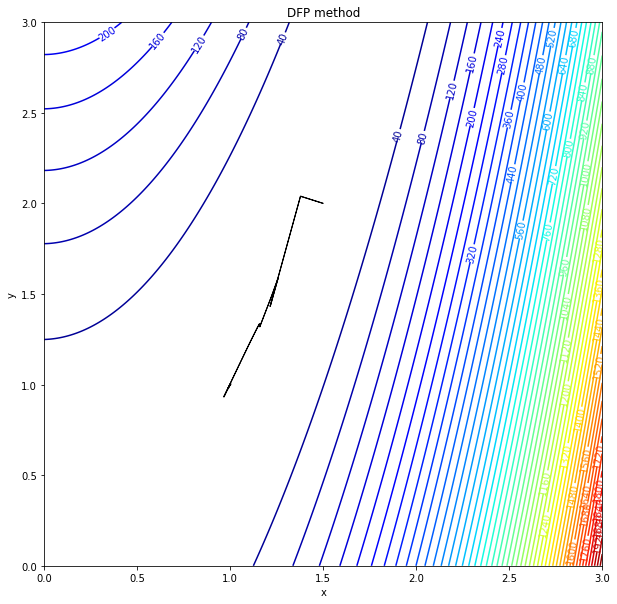

Approximate convergence rate: 1.524840467905165


In [21]:
plot_path(path_DFP,f,'DFP method')
print('Approximate convergence rate:',approx_convergence_rate(path_DFP,[1,1],5))

### Broyden-Fletcher-Goldfarb–Shanno (BFGS) method

The final quasi-Newton method we introduced is the most popular for a variety of reasons, called the **Broyden-Fletcher-Goldfarb–Shanno (BFGS) method**. It is extremely similar to the DFP method, **preserving symmetric positive definitess** of $H_k$ via a slighly different **rank-2 update**. Indeed BFGS can be shown to be the *dual* of DFP, meaning the methods are equivalent under an interchange of the inverse Hessian, $H_k$, and the Hessian itself, $B_k$, as well as an interchange between $\mathbf{s}_k$ and $\mathbf{y}_k$. The BFGS update is given by

$$ H_{k+1} = \left(I-\frac{\mathbf{s}_k\mathbf{y}_k^T}{\mathbf{y}_k^T\mathbf{s}_k}\right)H_k\left(I-\frac{\mathbf{y}_k\mathbf{s}_k^T}{\mathbf{y}_k^T\mathbf{s}_k}\right) + \frac{\mathbf{s}_k\mathbf{s}_k^T}{\mathbf{y}_k^T\mathbf{s}_k} $$

However, in practice, the above form of $H_{k+1}$ is not what is used for calculation due to requiring the construction of multiple temporary matrices (each bracketed term). Instead, we can expand brackets, noting that $\mathbf{y}_k^TH_k\mathbf{y}_k$ is a scalar, to get

$$ \begin{align*}
    H_{k+1} &= \left(I-\frac{\mathbf{s}_k\mathbf{y}_k^T}{\mathbf{y}_k^T\mathbf{s}_k}\right)\left(H_k-\frac{H_k\mathbf{y}_k\mathbf{s}_k^T}{\mathbf{y}_k^T\mathbf{s}_k}\right) + \frac{\mathbf{s}_k\mathbf{s}_k^T}{\mathbf{y}_k^T\mathbf{s}_k} \\
    &= H_k - \frac{H_k\mathbf{y}\mathbf{s}_k^T}{\mathbf{y}_k^T\mathbf{s}_k} - \frac{\mathbf{s}_k\mathbf{y}_k^TH_k}{\mathbf{y}_k^T\mathbf{s}_k} + \frac{\mathbf{s}_k\mathbf{y}_k^TH_k\mathbf{y}_k\mathbf{s}_k^T}{(\mathbf{y}_k^T\mathbf{s}_k)^2} + \frac{\mathbf{s}_k\mathbf{s}_k^T}{\mathbf{y}_k^T\mathbf{s}_k} \\
    &= H_k + (\mathbf{y}_k^T\mathbf{s}_k+\mathbf{y}_k^T H_k \mathbf{y}_k)\frac{\mathbf{s}_k \mathbf{s}_k^T}{(\mathbf{y}_k^T \mathbf{s}_k)^2} - \frac{H_k \mathbf{y}_k \mathbf{s}_k^T + \mathbf{s}_k \mathbf{y}_k^TH_k}{\mathbf{y}_k^T\mathbf{s}_k} 
\end{align*}$$

Empirically, BFGS tends to be much more efficient than DFP, leading to its ubiquity (for example, almost all of the optimization-related methods in the [scikit-learn](https://scikit-learn.org/stable/index.html) package use BFGS as the default solver).

Indeed we see this efficiency in action below:

In [22]:
%%time
x,y = x0,y0    # initial point
path_BFGS = [[x,y]]
tol = 1e-7            # stop when gradient is smaller than this amount
max_steps = 10000     # Maximum number of steps to run the iteration
i=0                   # iteration count
rho = 0.75            # rho for backtracking
H = np.eye(2)         # initial inverse Hessian is identity
dx = Df(x,y)          # current gradient
while np.linalg.norm(dx)>tol and i<max_steps:
    pk = -H@dx
    
    # backtracking
    alpha = 1
    while not WolfeI(alpha,f,np.array([x,y]),dx,pk) and alpha>1e-5:  # lower limit to prevent small steps, similar to Wolfe II
        alpha *= rho
        
    xnew,ynew = x + alpha*pk[0], y + alpha*pk[1]
    path_BFGS.append([xnew,ynew])
    
    # secant variables
    sk = alpha*pk         # x_{k+1}-x_k
    yk = Df(xnew,ynew)-dx # Df_{k+1}-Df_k
    
    # BFGS update
    vec = H@yk
    denom = yk@sk
    H += (denom+vec@yk)*np.outer(sk,sk)/denom**2 - (np.outer(vec,sk)+np.outer(sk,vec))/denom

    x,y = xnew,ynew
    dx = Df(x,y)
    i += 1

path_BFGS=np.array(path_BFGS)
print(f'After {i} iterations, approximate minimum is {f(x,y)} at {x,y}')

After 15 iterations, approximate minimum is 7.956041429179951e-21 at (0.9999999999483545, 0.9999999998821643)
Wall time: 2 ms


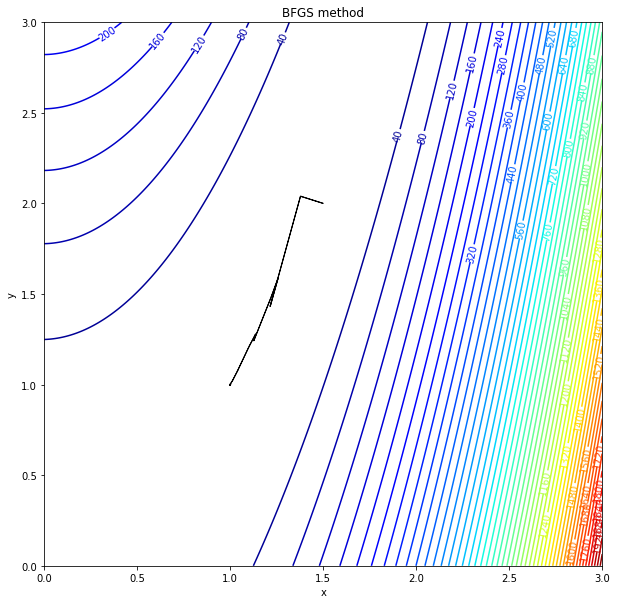

Approximate convergence rate: 1.5054568398227428


In [23]:
plot_path(path_BFGS,f,'BFGS method')
print('Approximate convergence rate:',approx_convergence_rate(path_BFGS,[1,1],5))